In [1]:
import sys
#sys.path.insert(1,'/Users/kailaiwang/Documents/AEI_Research/TEOBResumS/eccentric/python')
sys.path.insert(1,'/work/kailai.wang/teobresums/Python')
import EOBRun_module
#import SEOBNRE
import sxs
import Functions as fun
from importlib import reload
fun=reload(fun)
import argparse
from configparser import ConfigParser
import corner
import os
import pandas as pd
import glob
import json
import numpy as np
from pycbc import psd
import h5py
from scipy.interpolate import interp1d
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import dynesty
from dynesty import plotting as dyplot
from pycbc.waveform import td_approximants
import pycbc.psd
from pycbc.pool import choose_pool
import csv
##########################
import aux_fun as functions
import SXS_module as sxs
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize,curve_fit
import romspline
import h5py
import math
from dynesty.utils import resample_equal
import corner
import json
import random

In [2]:
from pycbc.waveform import td_approximants, fd_approximants, get_td_waveform

In [3]:
print(td_approximants())

['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'TEOBResumS', 'IMRPhenomT', 'IMRPhenomTHM', 'IMRPhenomTP', 'IMRPhenomTPHM', 'TaylorF2', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'SEOBNRv2_ROM_EffectiveSpin', 'SEOBN

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [5]:
# import os
# os.environ['LD_LIBRARY_PATH']='/work/kailai.wang/SEOBNREHM/src/'
# print(os.environ['LD_LIBRARY_PATH'])

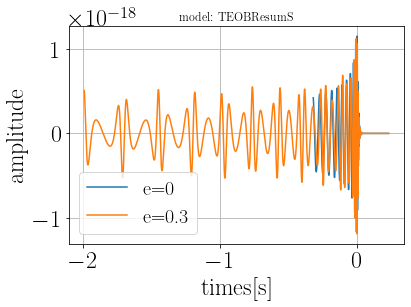

In [6]:
for e in [0,0.3]:
    hp, hc = get_td_waveform(approximant='SEOBNREHM',
                             mass1=50,
                             mass2=50,
                             spin1z=0,
                             eccentricity=e,
                             delta_t=1.0/4096,
                             f_lower=20)
    plt.plot(hp.sample_times.data,hp,label="e=" + str(e))
    # hp2,hc2=get_td_waveform(approximant='SEOBNRE',
    #                          mass1=10,
    #                          mass2=10,
    #                          spin1z=0,
    #                          eccentricity=e,
    #                          delta_t=1.0/4096,
    #                          f_lower=40)
    # plt.plot(hp2.sample_times.data,hp2,color='blue')

plt.title("model: TEOBResumS")
plt.ylabel("amplitude")
plt.xlabel("times[s]")
plt.legend()

In [7]:
# print(hp.sample_times.data)

In [8]:
# t=hp.sample_times.data
# eob_wave =(hp + 1j*hc).data
# tmrg = t[np.argmax(np.abs(eob_wave))]
# t = t - tmrg
# #my changes here
# t = fun.time_to_t_NR(t,100)

# hp=fun.amp_to_nr(hp,100,100)
# hc=fun.amp_to_nr(hc,100,100)

# eob_wave_phys=(hp+1j*hc).data

#     #return t, eob_wave_phys

In [9]:
# mass1=50
# mass=50
# spin1=0
# spin2=0
# distance=100


